In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav')
url

<Response [403]>

In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav', headers=headers).text

soup=BeautifulSoup(url, 'html.parser')

soup2=BeautifulSoup(soup.prettify(), 'html.parser')


In [4]:
# companies on the first page of the website 

for i in soup2.find_all('h2'):
    print(i.text.strip())
    
company=soup.find_all('div', class_='company-info-wrapper')
len(company)

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
Concentrix Corpo...
IBM
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
Bharti Airtel
BYJU'S
Tata Motors
Flipkart
WNS
Mahindra & Mahin...


30

In [5]:
# Extracting data from all the pages of the website

final_df=pd.DataFrame()

for j in range(1, 150):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    webpage=requests.get(url, headers=headers).text
    
    soup=BeautifulSoup(webpage, 'html.parser')
    
    company=soup.find_all('div', class_='company-content-wrapper')
    
    name=[]
    rating=[]
    review=[]
    ctype=[]
    location=[]
    old_in_years=[]
    employees=[]

    for i in company:
        name.append(i.find('h2', class_='company-name').text.strip())
        rating.append(i.find('p', class_='rating').text.strip())
        review.append(i.find('a', class_='review-count').text.strip())
        try:
            ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
            
        try:
            location.append(i.find_all('p', class_='infoEntity')[1].text.strip())
        except:
            location.append(np.nan)
            
        try:
            old_in_years.append(i.find_all('p', class_='infoEntity')[2].text.strip())
        except:
            old_in_years.append(np.nan)
        try:
            employees.append(i.find_all('p', class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)
        
    d={'name': name, 'rating': rating, 'review': review, 'ctype': ctype, 'location': location, 'old_in_years':old_in_years, 'employees':employees}
    df=pd.DataFrame(d)
    
    final_df=final_df.append(df, ignore_index=True)

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_10400\2769601861.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df, ignore_index=True)


In [6]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(51.4k Reviews),Public,"Mumbai,Maharashtra + 271 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.8k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(30.2k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(34.1k Reviews),Public,"Mumbai,Maharashtra + 1059 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(40.1k Reviews),Public,"Mumbai,Maharashtra + 1269 more",29 years old,50k-1 Lakh Employees (India)


In [7]:
final_df.shape

(4469, 7)

### Data Mining

In [8]:
# Finding null values in the dataset

final_df.isnull().mean()*100

name            0.000000
rating          0.000000
review          0.000000
ctype           0.000000
location        0.984560
old_in_years    3.087939
employees       9.554710
dtype: float64

In [9]:
# we have to drop the null values as some values have jumbled up in the middle part of the dataset which has left most of the null values in the 'employees' section.
# I have tried correcting it multiple times but everytime i run the program as fresh , the null values changes, making it hard to correct it. 

final_df.dropna(inplace=True)

In [10]:
final_df.isnull().mean()*100

name            0.0
rating          0.0
review          0.0
ctype           0.0
location        0.0
old_in_years    0.0
employees       0.0
dtype: float64

In [11]:
final_df.shape

(4042, 7)

In [12]:
# Splitting 'Reviews' from every row of the 'review' column.

def review(x):
    return x.split(' ')[0].split('(')[1]

final_df['review']=final_df['review'].apply(review)

In [13]:
# Splitting 'years old' from every row of the 'old_in_years' column.
# Changing the name of the 'old_in_years' column.

def year(x):
    return x.split(' ')[0]

final_df['total_no_of_years']=final_df['old_in_years'].apply(year)

In [14]:
# Splitting 'location' from the 'location' column.
# Also assigning it a new name.

def hq(x):
    return x.split('+')[0]

final_df['Hq']=final_df['location'].apply(hq)

final_df.drop('old_in_years', axis=1, inplace=True)

In [15]:
# since we can see some of the places are same but are differently spelt.
# So we have to correct the spelling manually to perform proper data visualizations.

final_df.replace('Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Teaneck. New Jersey. ', 'Teaneck,NewJersey', inplace=True)
final_df.replace('Dublin ', 'Dublin,Ireland ', inplace=True)
final_df.replace('Seoul ', 'Seoul,SouthKorea ', inplace=True)
final_df.replace('Seoul,Seoul ', 'Seoul,SouthKorea ', inplace=True)
final_df.replace('Florida ', 'FLorida,USA ', inplace=True)
final_df.replace('Gerlingen ', 'Gerlingen,Baden-Wuerttemberg ', inplace=True)
final_df.replace('Durham ', 'Durham,England ', inplace=True)
final_df.replace('Minnesota ', 'Minnetonka,Minnesota ', inplace=True)
final_df.replace('Frankfurt ', 'Frankfurt,Germany ', inplace=True)
final_df.replace('Charlotte ', 'Charlotte,NorthCarolina ', inplace=True)
final_df.replace('Copenhagen ', 'Copenhagen,Denmark ', inplace=True)
final_df.replace('Issy Les Moulineaux ', 'Issy Les Moulineaux,Paris ', inplace=True)
final_df.replace('Zurich ', 'Zurich,Switzerland ', inplace=True)
final_df.replace('Wong Chuk Hang ', 'Wong Chuk Hang,HongKong ', inplace=True)
final_df.replace('Warren ', 'Warrenburg,Missouri ', inplace=True)
final_df.replace('Allahabad ', 'Allahabad,Uttar Pradesh ', inplace=True)
final_df.replace('Ahmednagar ', 'Ahmednagar,Maharashtra ', inplace=True)
final_df.replace('Thiruvananthapuram ', 'Thiruvananthapuram,AndhraPradesh ', inplace=True)
final_df.replace('Trivandrum/Thiruvananthapuram,Kerala ', 'Thiruvananthapuram,AndhraPradesh ', inplace=True)
final_df.replace('Meerut ', 'Meerut,Uttar Pradesh ', inplace=True)
final_df.replace('Coventry ', 'Coventry,England ', inplace=True)
final_df.replace('California ', 'California,USA ', inplace=True)
final_df.replace('Brisbane ', 'Brisbane,Australia ', inplace=True)
final_df.replace('Dehradun ', 'Dehradun,Uttarakhand ', inplace=True)
final_df.replace('Mysore ', 'Mysore,Karnataka ', inplace=True)
final_df.replace('Sydney ', 'Sydney,New South Wales ', inplace=True)
final_df.replace('Jakarta ', 'Jakarta,Indonesia ', inplace=True)
final_df.replace('Hosur ', 'Hosur,Karnataka ', inplace=True)
final_df.replace('Allahabad/Prayagraj,Uttar Pradesh ', 'Allahabad,Uttar Pradesh ', inplace=True)
final_df.replace('Londonderry ', 'Londonderry,England ', inplace=True)
final_df.replace('Kyoto ', 'Kyoto,Japan ', inplace=True)
final_df.replace('Petaling Jaya ', 'Jaya,Indonesia ', inplace=True)
final_df.replace('Hopkinton ', 'Hopkinton,Massachusetts ', inplace=True)
final_df.replace('Aurangabad ', 'Aurangabad,Maharashtra ', inplace=True)
final_df.replace('Moon Township ', 'Moon Township,Pennsylvania ', inplace=True)
final_df.replace('Bonn ', 'Bonn,Germany ', inplace=True)
final_df.replace('Hertfordshire ', 'Hertfordshire,England ', inplace=True)
final_df.replace('Saint-Ouen ', 'Saint-Ouen,Paris ', inplace=True)
final_df.replace('Herborn ', 'Herborn,Hesse ', inplace=True)
final_df.replace('Plymouth ', 'Plymouth,Devon ', inplace=True)
final_df.replace('Thiruvananthapuram ', 'Thiruvananthapuram,Kerala ', inplace=True)
final_df.replace('Kapurthala\xa0,Punjab ', 'Kapurthala,Punjab ', inplace=True)
final_df.replace('Bilaspur ', 'Bilaspur,Chattisgarh ', inplace=True)
final_df.replace('Cambridge ', 'Cambridge,England ', inplace=True)
final_df.replace('Kanagawa ', 'Kanagawa,Japan ', inplace=True)
final_df.replace('Lucknow ', 'Uttar Pradesh ', inplace=True)
final_df.replace('Wolfratshausen ', 'Wolfratshausen,Bavaria ', inplace=True)
final_df.replace('Velagapudi ', 'Velagapudi,Guntur ', inplace=True)
final_df.replace('Visakhapatnam ', 'Visakhapatnam,AndhraPradesh ', inplace=True)
final_df.replace('Levallois-Perret ', 'Levallois,Perret ', inplace=True)
final_df.replace('Bharuch ', 'Bharuch,Gujarat ', inplace=True)
final_df.replace('Lyngby ', 'Lyngby,Denmark ', inplace=True)
final_df.replace('fuschl ', 'fuschl,Austria ', inplace=True)
final_df.replace('Bengaluru/Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bengaluru ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore/Bengaluru,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore ', 'Bengaluru,Karnataka ',inplace=True)
final_df.replace('Bengaluru/Bangalore ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Noida ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Greater Noida,Uttar Pradesh ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Navi Mumbai,Maharashtra ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Nashik ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Nasik/Nashik,Maharashtra ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('GURGAON ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgram ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Faridabad ','Faridabad,Haryana ', inplace=True)
final_df.replace('Ahmedabad,Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahemdabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad,\xa0India ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('New York,New York ','New York City,New York ', inplace=True)
final_df.replace('New York,New York, ','New York City,New York ', inplace=True)
final_df.replace('New York ','New York City,New York ', inplace=True)
final_df.replace('New York','New York City,New York ', inplace=True)
final_df.replace('New York,NY ','New York City,New York ', inplace=True)
final_df.replace('Purchase,New York ','New York City,New York ', inplace=True)
final_df.replace('Chennai ', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai,Tamil Nadu', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Paris ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile de France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,√éle-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Delhi,NCT ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi/NCR,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Pune ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Lonavla ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune,Indore ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Osaka ', 'Osaka,Japan ', inplace=True)
final_df.replace('Geneva,Geneva ', 'Geneva,Switzerland ', inplace=True)
final_df.replace('Abu Dhabi,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Al Ain,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Kolkata ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,India ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,West Bengal', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Hyderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad,Telangana ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Tokyo,Tokyo-to ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Toyota City,Aichi Prefecture ', 'Tokyo,Japan ', inplace=True)
final_df.replace('London,London ', 'London,England ', inplace=True)
final_df.replace('London ', 'London,England ', inplace=True)
final_df.replace('Dubai,Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Ota City,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Jodhpur ', 'Jodhpur, Rajasthan ', inplace=True)


In [16]:
# Setting the index in order.

final_df.reset_index()


,index,name,rating,review,ctype,location,employees,total_no_of_years,Hq
0,0,TCS,3.9,51.4k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra"
1,1,Accenture,4.1,32.8k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,"Dublin,Ireland"
2,2,Cognizant,3.9,30.2k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,"Teaneck,NewJersey"
3,3,ICICI Bank,4.0,34.1k,Public,"Mumbai,Maharashtra + 1059 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra"
4,4,HDFC Bank,4.0,40.1k,Public,"Mumbai,Maharashtra + 1269 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra"
...,...,...,...,...,...,...,...,...,...
4037,4464,CANTABIL RETAIL ...,3.8,120,Public,"Delhi/NCR,New Delhi + 37 more",1k-5k Employees (India),23,"Delhi/NCR,Delhi"
4038,4465,Técnicas Reunida...,4.6,120,Private,"Madrid,Madrid + 13 more",5k-10k Employees (Global),51,"Madrid,Madrid"
4039,4466,Apollo Diagnosti...,4.1,120,Private,Hyderabad + 32 more,201-500 Employees (India),8,"Hyderabad,Telangana"
4040,4467,Magnasoft Consul...,3.8,120,Private,"Bangalore/Bengaluru,Karnataka + 8 more",501-1k Employees (India),23,"Bengaluru,Karnataka"


In [17]:
# Separating the values of 'Hq' for better visualization.

new=final_df['Hq'].str.split(',', n=1, expand=True)
new

,0,1
0,Mumbai,Maharashtra
1,Dublin,Ireland
2,Teaneck,NewJersey
3,Mumbai,Maharashtra
4,Mumbai,Maharashtra
...,...,...
4464,Delhi/NCR,Delhi
4465,Madrid,Madrid
4466,Hyderabad,Telangana
4467,Bengaluru,Karnataka


In [18]:
final_df['city']=new[0]

In [19]:
final_df['State']=new[1]

In [20]:
final_df.head()

,name,rating,review,ctype,location,employees,total_no_of_years,Hq,city,State
0,TCS,3.9,51.4k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra
1,Accenture,4.1,32.8k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,"Dublin,Ireland",Dublin,Ireland
2,Cognizant,3.9,30.2k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,"Teaneck,NewJersey",Teaneck,NewJersey
3,ICICI Bank,4.0,34.1k,Public,"Mumbai,Maharashtra + 1059 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra
4,HDFC Bank,4.0,40.1k,Public,"Mumbai,Maharashtra + 1269 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 4468
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4042 non-null   object
 1   rating             4042 non-null   object
 2   review             4042 non-null   object
 3   ctype              4042 non-null   object
 4   location           4042 non-null   object
 5   employees          4042 non-null   object
 6   total_no_of_years  4042 non-null   object
 7   Hq                 4042 non-null   object
 8   city               4042 non-null   object
 9   State              3718 non-null   object
dtypes: object(10)
memory usage: 347.4+ KB


In [22]:
# Converting the object data type to integer

final_df['rating']=final_df['rating'].astype('float')
final_df['total_no_of_years']=final_df['total_no_of_years'].astype('int')

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 4468
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4042 non-null   object 
 1   rating             4042 non-null   float64
 2   review             4042 non-null   object 
 3   ctype              4042 non-null   object 
 4   location           4042 non-null   object 
 5   employees          4042 non-null   object 
 6   total_no_of_years  4042 non-null   int32  
 7   Hq                 4042 non-null   object 
 8   city               4042 non-null   object 
 9   State              3718 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 331.6+ KB


In [24]:
# Renaming the columns for better readability 

final_df.rename(columns={'name':'Company_name', 'review':'Reviews','rating':'Rating', 'ctype':'Company_type','location':'Total_Locations', 'employees':'Employees','total_no_of_years':'Total_no_of_years'}, inplace=True)


In [25]:
final_df.head(1)

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq,city,State
0,TCS,3.9,51.4k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra


In [26]:
# Separating the 'Total_Locations' to get the integer part.

location=final_df['Total_Locations'].str.split('+', n=1, expand=True)
location

,0,1
0,"Mumbai,Maharashtra",271 more
1,Dublin,131 more
2,Teaneck. New Jersey.,101 more
3,"Mumbai,Maharashtra",1059 more
4,"Mumbai,Maharashtra",1269 more
...,...,...
4464,"Delhi/NCR,New Delhi",37 more
4465,"Madrid,Madrid",13 more
4466,Hyderabad,32 more
4467,"Bangalore/Bengaluru,Karnataka",8 more


In [27]:
final_df['Locations across the Globe']=location[1].str.replace('more', '')

In [28]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq,city,State,Locations across the Globe
0,TCS,3.9,51.4k,Public,"Mumbai,Maharashtra + 271 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",Mumbai,Maharashtra,271
1,Accenture,4.1,32.8k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,"Dublin,Ireland",Dublin,Ireland,131
2,Cognizant,3.9,30.2k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,"Teaneck,NewJersey",Teaneck,NewJersey,101
3,ICICI Bank,4.0,34.1k,Public,"Mumbai,Maharashtra + 1059 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra,1059
4,HDFC Bank,4.0,40.1k,Public,"Mumbai,Maharashtra + 1269 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra",Mumbai,Maharashtra,1269


In [29]:
final_df.drop(columns=['Total_Locations', 'Hq'], inplace=True)

In [30]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,city,State,Locations across the Globe
0,TCS,3.9,51.4k,Public,1 Lakh+ Employees (India),55,Mumbai,Maharashtra,271
1,Accenture,4.1,32.8k,Public,1 Lakh+ Employees (India),34,Dublin,Ireland,131
2,Cognizant,3.9,30.2k,Private,1 Lakh+ Employees (India),29,Teaneck,NewJersey,101
3,ICICI Bank,4.0,34.1k,Public,1 Lakh+ Employees (India),29,Mumbai,Maharashtra,1059
4,HDFC Bank,4.0,40.1k,Public,50k-1 Lakh Employees (India),29,Mumbai,Maharashtra,1269


In [31]:
# Replacing the extra space in the data.

final_df['city']=final_df['city'].str.replace(' ','')

In [32]:
# Replacing the extra space in the data.

final_df['State']=final_df['State'].str.replace(' ', '')

In [33]:
# Replacing the extra space in the data.

final_df['Locations across the Globe']=final_df['Locations across the Globe'].str.replace(' ','')

In [34]:
final_df['Locations across the Globe'].unique()

array(['271', '131', '101', '1059', '1269', '225', '125', '79', '211',
       '68', '140', '377', '1109', '70', '121', '998', '528', '803',
       '567', '705', '478', '502', '530', '259', '388', '452', '24',
       '421', '571', '72', '56', '73', '373', '418', '52', '684', '165',
       '38', '51', '133', '41', '188', '367', '321', '316', '346', '42',
       '419', '400', '132', '65', '15', '32', '270', '67', '345', '631',
       '60', '237', '26', '362', '244', '379', '504', '326', '19', '11',
       '479', '118', '689', '157', '139', '50', '187', '328', '570',
       '300', '161', '122', '85', '307', '31', '169', '46', '97', '33',
       '363', '205', '55', '370', '59', '267', '197', '135', '240', '29',
       '25', '105', '229', '84', '208', '269', '14', '403', '253', '354',
       '405', '201', '10', '111', '54', '21', '113', '501', '88', '250',
       '71', '30', '104', '204', '296', '80', '186', '45', '440', '12',
       '83', '446', '96', '498', '434', '76', '397', '23', '213',

In [35]:
final_df.isnull().sum()

Company_name                    0
Rating                          0
Reviews                         0
Company_type                    0
Employees                       0
Total_no_of_years               0
city                            0
State                         324
Locations across the Globe     39
dtype: int64

In [36]:
# Replacing the null values in the 'State' column with the values in the 'city' column.

final_df['State']= np.where(final_df['State'].isnull(), final_df['city'], final_df['State'])

In [37]:
final_df.isnull().sum()

Company_name                   0
Rating                         0
Reviews                        0
Company_type                   0
Employees                      0
Total_no_of_years              0
city                           0
State                          0
Locations across the Globe    39
dtype: int64

In [38]:
# Dropping the null values
final_df.dropna(inplace=True)

In [39]:
# Checking for the null values 
final_df.isnull().sum()

Company_name                  0
Rating                        0
Reviews                       0
Company_type                  0
Employees                     0
Total_no_of_years             0
city                          0
State                         0
Locations across the Globe    0
dtype: int64

In [40]:
# Finding the shape after removing the null values.
final_df.shape

(4003, 9)

In [42]:
# Replacing the k with a 1000 and also multiplying it with the respective no.

final_df['Reviews']=final_df["Reviews"].replace({"k":"*1e3"}, regex=True).map(pd.eval).astype(int)

In [43]:
final_df['Locations across the Globe']=final_df['Locations across the Globe'].astype('int')
final_df['Reviews']=final_df['Reviews'].astype('int')

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 0 to 4468
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_name                4003 non-null   object 
 1   Rating                      4003 non-null   float64
 2   Reviews                     4003 non-null   int32  
 3   Company_type                4003 non-null   object 
 4   Employees                   4003 non-null   object 
 5   Total_no_of_years           4003 non-null   int32  
 6   city                        4003 non-null   object 
 7   State                       4003 non-null   object 
 8   Locations across the Globe  4003 non-null   int32  
dtypes: float64(1), int32(3), object(5)
memory usage: 265.8+ KB


In [45]:
final_df.rename(columns={'city':'City', 'State':'State/Country'}, inplace=True)

In [46]:
final_df.sample(5)

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe
1779,Heidelberg Cemen...,3.9,288,Private,1k-5k Employees (India),17,Gurgaon,Haryana,43
32,DXC Technology,3.9,7100,Public,10k-50k Employees (India),6,Minato,Tokyo,56
4014,New Allenberry W...,3.7,135,Private,201-500 Employees (India),52,Faridabad,Haryana,6
2195,ELGI Equipments,4.0,252,Public,1k-5k Employees (India),63,Coimbatore,TamilNadu,22
3707,Veeba Food Servi...,4.5,146,Private,1k-5k Employees (India),40,Delhi/NCR,Delhi,22


In [47]:
# Removing 'Employees' in the data from the 'Employees' column

final_df['Employees']=final_df['Employees'].str.replace('Employees', '')

In [48]:
final_df['Employees'].value_counts()

1k-5k  (India)          1673
501-1k  (India)          790
201-500  (India)         505
10k-50k  (India)         316
5k-10k  (India)          273
51-200  (India)          246
1 Lakh+  (India)          44
11-50  (India)            43
50k-1 Lakh  (India)       34
1k-5k  (Global)           19
5k-10k  (Global)          18
1-10  (India)             15
201-500  (Global)         10
10k-50k  (Global)          7
501-1k  (Global)           5
1 Lakh+  (Global)          3
50k-1 Lakh  (Global)       1
51-200  (Global)           1
Name: Employees, dtype: int64

In [49]:
#Separating the 'Employees' column into multiple columns to get the desired data.

loc=final_df['Employees'].str.split(' ', n=2, expand=True)
loc

,0,1,2
0,1,Lakh+,(India)
1,1,Lakh+,(India)
2,1,Lakh+,(India)
3,1,Lakh+,(India)
4,50k-1,Lakh,(India)
...,...,...,...
4464,1k-5k,,(India)
4465,5k-10k,,(Global)
4466,201-500,,(India)
4467,501-1k,,(India)


In [50]:
final_df['Employees']=loc[0]+loc[1]

In [51]:
final_df['Employees'].unique()

array(['1Lakh+', '50k-1Lakh', '10k-50k', '1k-5k', '5k-10k', '201-500',
       '501-1k', '51-200', '11-50', '1-10'], dtype=object)

In [52]:
# After separating the 'Employees' column, from there taking one of its column and making a new data out of it. 

final_df['Work_location']=loc[2].str.replace('(', '').str.replace(')', '')

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_10400\1193500124.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['Work_location']=loc[2].str.replace('(', '').str.replace(')', '')


In [53]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
0,TCS,3.9,51400,Public,1Lakh+,55,Mumbai,Maharashtra,271,India
1,Accenture,4.1,32800,Public,1Lakh+,34,Dublin,Ireland,131,India
2,Cognizant,3.9,30200,Private,1Lakh+,29,Teaneck,NewJersey,101,India
3,ICICI Bank,4.0,34100,Public,1Lakh+,29,Mumbai,Maharashtra,1059,India
4,HDFC Bank,4.0,40100,Public,50k-1Lakh,29,Mumbai,Maharashtra,1269,India


## Data Visualization

### Cities with maximum no. of Headquarters

In [54]:
chains=final_df['City'].value_counts()[0:20]
chains

Mumbai             703
Delhi/NCR          314
Bengaluru          307
Gurgaon            265
Chennai            209
Hyderabad          178
Noida              172
Pune               139
Kolkata            101
Ahmedabad           84
NewYorkCity         53
London              51
Faridabad           29
Jaipur              25
Paris               25
Dubai               24
SanJose             23
Tokyo               19
Vadodara/Baroda     19
Thane               17
Name: City, dtype: int64

In [55]:
chains.index

Index(['Mumbai', 'Delhi/NCR', 'Bengaluru', 'Gurgaon', 'Chennai', 'Hyderabad',
       'Noida', 'Pune', 'Kolkata', 'Ahmedabad', 'NewYorkCity', 'London',
       'Faridabad', 'Jaipur', 'Paris', 'Dubai', 'SanJose', 'Tokyo',
       'Vadodara/Baroda', 'Thane'],
      dtype='object')

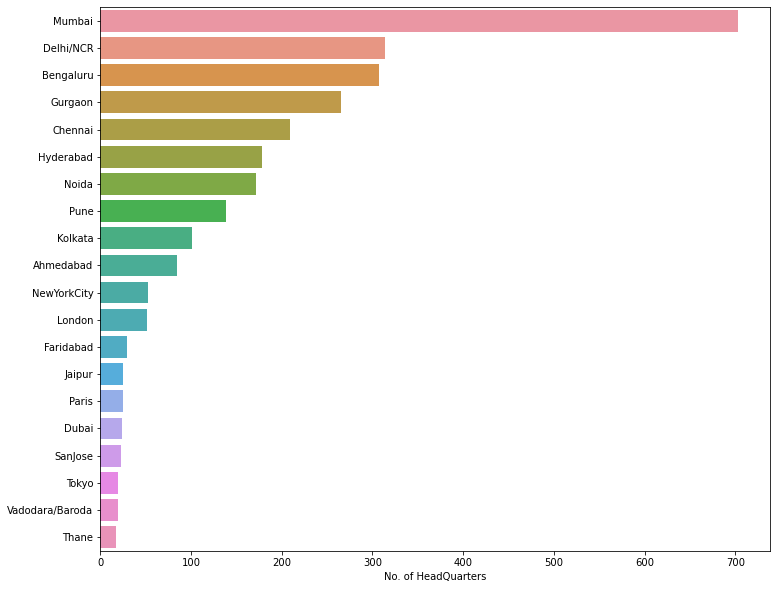

In [56]:
plt.figure(figsize=(12,10))
sns.barplot(x=chains, y=chains.index)
plt.xlabel('No. of HeadQuarters')
plt.show()

### Distribution of Company_type

In [57]:
typ=final_df['Company_type'].value_counts()
typ

Private                                     2781
Public                                      1128
JV                                            25
LLP                                           14
Government                                    13
Partnership                                   11
LLC                                            9
NGO/NPO                                        9
Govt Organisation                              6
Other                                          3
Central Public Sector Enterprises (CPSE)       1
Conglomerate                                   1
Sole Proprietorship                            1
Proprietorship                                 1
Name: Company_type, dtype: int64

In [58]:
typ.index

Index(['Private', 'Public', 'JV', 'LLP', 'Government', 'Partnership', 'LLC',
       'NGO/NPO', 'Govt Organisation', 'Other',
       'Central Public Sector Enterprises (CPSE)', 'Conglomerate',
       'Sole Proprietorship', 'Proprietorship'],
      dtype='object')

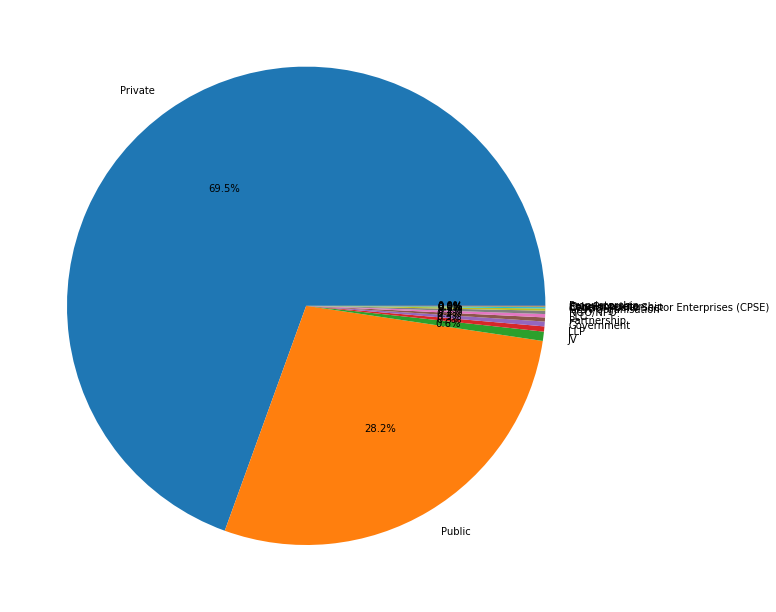

In [59]:
plt.figure(figsize=(12,11))
plt.pie(typ, labels=typ.index, autopct='%0.1f%%')
plt.show()

### Companies with max Reviews

In [60]:
r2=final_df.groupby('Company_name')['Reviews'].sum().nlargest(20)

In [61]:
r2.index

Index(['TCS', 'Reliance Industr...', 'Mahindra & Mahin...', 'HDFC Bank',
       'ICICI Bank', 'Accenture', 'Cognizant', 'Wipro', 'Infosys',
       'Larsen & Toubro ...', 'Capgemini', 'Tech Mahindra', 'Genpact',
       'Amazon', 'Axis Bank', 'HCLTech', 'Hinduja Group', 'Reliance Retail',
       'IBM', 'Concentrix Corpo...'],
      dtype='object', name='Company_name')

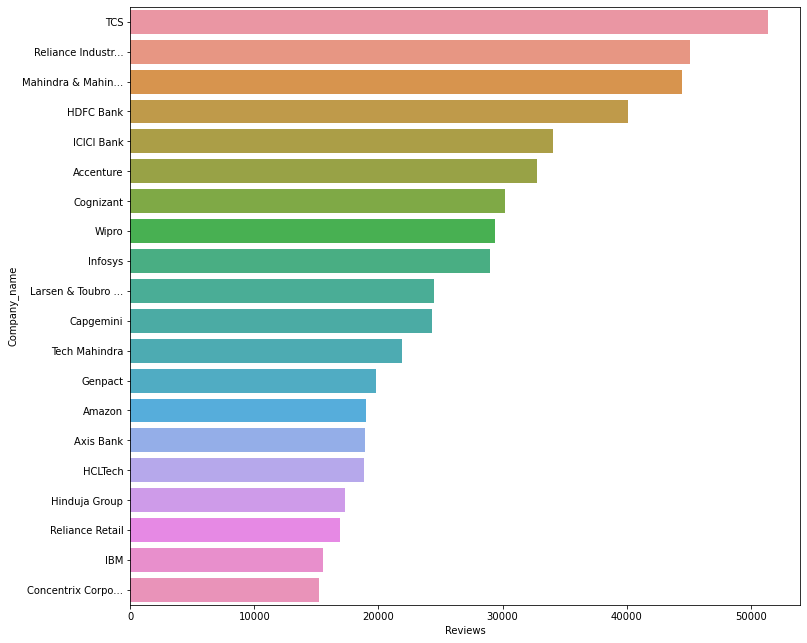

In [62]:
plt.figure(figsize=(12,11))
sns.barplot(x=r2, y=r2.index)
plt.show()

### Companies with most no. of locations

In [63]:
loca=final_df.groupby('Company_name')['Locations across the Globe'].sum().nlargest(20)

In [64]:
loca.index

Index(['HDFC Bank', 'Axis Bank', 'ICICI Bank', 'Reliance jio',
       'Mahindra & Mahin...', 'HDB Financial Se...', 'Reliance Retail',
       'Shriram Transpor...', 'Bajaj Finserv', 'Bajaj Finance',
       'IndusInd Bank', 'Bandhan Bank', 'Vodafone Idea', 'Bharti Airtel',
       'Larsen & Toubro ...', 'ICICI Prudential...', 'IIFL',
       'Reliance Industr...', 'Ecom Express', 'Cholamandalam In...'],
      dtype='object', name='Company_name')

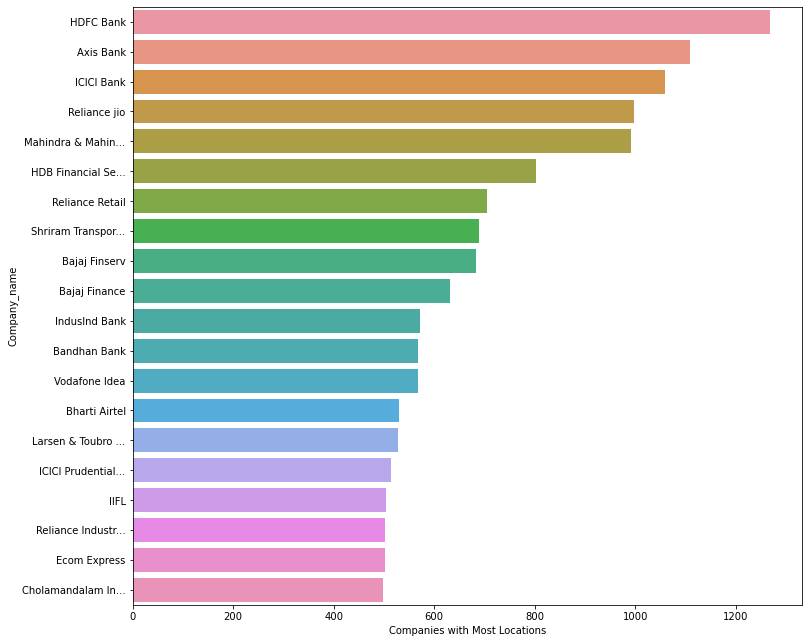

In [65]:
plt.figure(figsize=(12,11))
sns.barplot(x=loca, y=loca.index)
plt.xlabel('Companies with Most Locations')
plt.show()

### Give an estimate on the companies lying betweem  3.0-5.0 in Rating.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


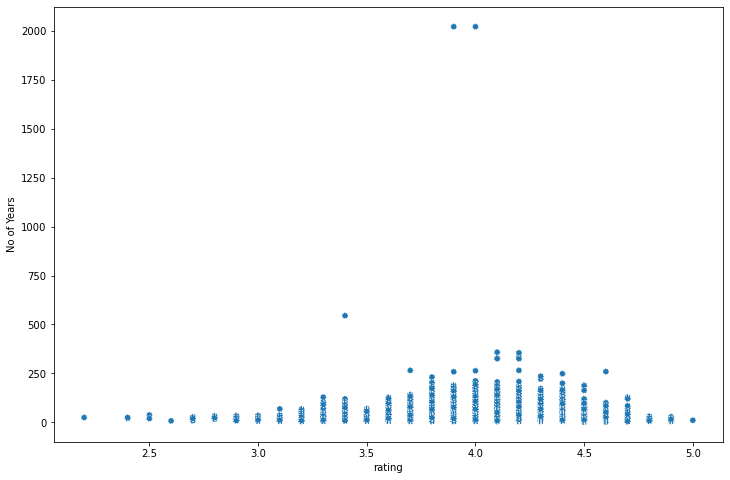

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(final_df['Rating'], final_df['Total_no_of_years'], linewidth=1, linestyle=':')
plt.xlabel('rating')
plt.ylabel('No of Years')
plt.show()

# from here we can see that, most of the companies which have around 20-30 years to 160-180 years of presence lies between 3.0 - 4.6 in rating. 

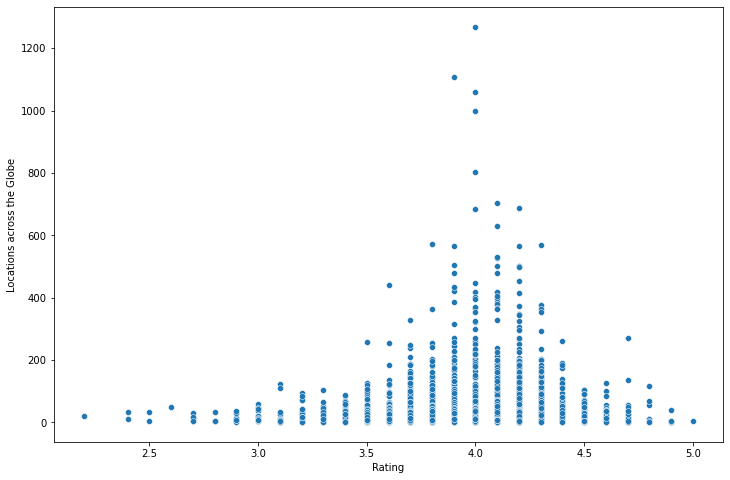

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=final_df['Rating'], y=final_df['Locations across the Globe'])
plt.show()

### Top Companies and there presence in the market

In [68]:
# Grouping two columns together

final_df.groupby('Company_name')['Total_no_of_years'].sum().nlargest(20)

Company_name
Prodapt Solution...    2023
TDK India              2023
Oxford Universit...     545
Saint-Gobain            358
Merck Life Scien...     355
Barclays                333
Aviva Life Insur...     327
London Stock Exc...     325
Refinitiv               325
Cox & Kings             265
MAN Truck & Bus         265
Hamleys                 263
Army Medical Cor...     259
Forbes & Company        258
Ordnance Factory        248
EID Parry (India...     235
Praxair                 232
Fidelity Nationa...     231
State Street Cor...     231
DuPont                  221
Name: Total_no_of_years, dtype: int32

In [70]:
# finding exceptions
final_df[final_df['Total_no_of_years']==2023]

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
1130,Prodapt Solution...,3.9,444,Private,1k-5k,2023,Chennai,TamilNadu,7,India
1260,TDK India,4.0,403,Private,1k-5k,2023,Nashik,Maharashtra,19,India


In [71]:
# Assigning the index to Company_name
final_df.set_index('Company_name',inplace=True)

In [72]:
# Dropping both the values 
final_df.drop(['Prodapt Solution...', 'TDK India'], inplace=True)

In [73]:
# Resetting the index back to normal
final_df.reset_index(inplace=True)

In [74]:
comp=final_df.groupby('Company_name')['Total_no_of_years'].sum().nlargest(20)
comp

Company_name
Oxford Universit...    545
Saint-Gobain           358
Merck Life Scien...    355
Barclays               333
Aviva Life Insur...    327
London Stock Exc...    325
Refinitiv              325
Cox & Kings            265
MAN Truck & Bus        265
Hamleys                263
Army Medical Cor...    259
Forbes & Company       258
Ordnance Factory       248
EID Parry (India...    235
Praxair                232
Fidelity Nationa...    231
State Street Cor...    231
DuPont                 221
Citibank               211
Citigroup              211
Name: Total_no_of_years, dtype: int32

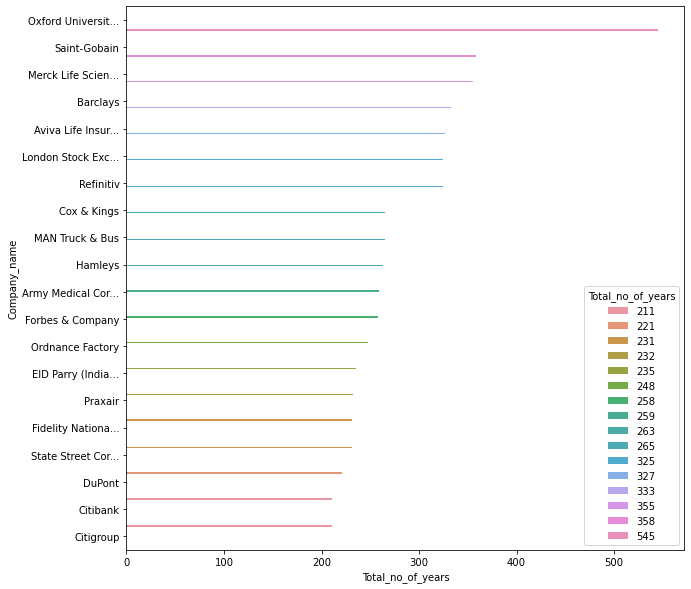

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(x=comp, y=comp.index, hue=comp, data=final_df)
plt.show()

### Which section of the Employees are the highest

In [76]:
emp=final_df['Employees'].value_counts()
emp

1k-5k        1690
501-1k        795
201-500       515
10k-50k       323
5k-10k        291
51-200        247
1Lakh+         47
11-50          43
50k-1Lakh      35
1-10           15
Name: Employees, dtype: int64

In [77]:
final_df.sample(5)

,Company_name,Rating,Reviews,Company_type,Employees,Total_no_of_years,City,State/Country,Locations across the Globe,Work_location
3659,Zscaler Softech,4.1,133,Private,1k-5k,15,SanJose,California,9,India
3936,Jaiprakash Power...,3.9,122,Public,5k-10k,29,Noida,UttarPradesh,8,India
2625,Talwalkars Bette...,3.8,185,Public,201-500,91,Mumbai,Maharashtra,52,India
3377,Saregama India,3.9,144,Public,201-500,122,Kolkata,WestBengal,27,India
3296,Nisa Industrial ...,4.0,147,Private,51-200,50,Mumbai,Maharashtra,31,India


In [78]:
final_df['Employees'].unique()

array(['1Lakh+', '50k-1Lakh', '10k-50k', '1k-5k', '5k-10k', '201-500',
       '501-1k', '51-200', '11-50', '1-10'], dtype=object)

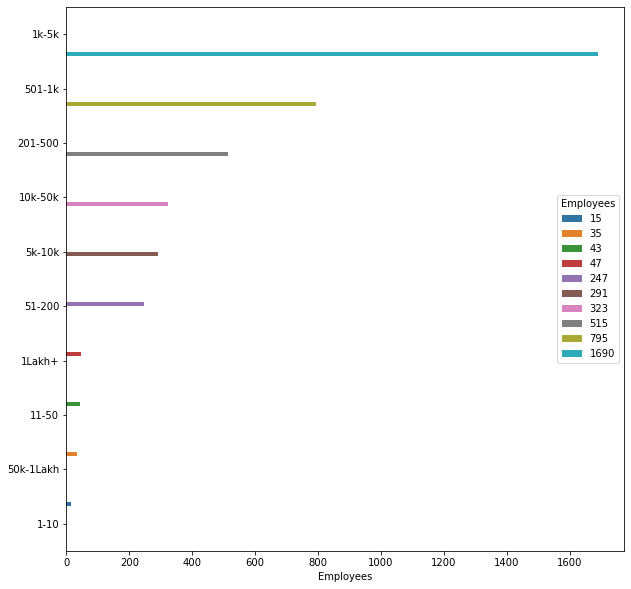

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(x=emp, y=emp.index, hue=emp)
plt.show()

### Distribution on the basis of Work location

In [80]:
final_df['Work_location'].unique()

array([' India', 'India', ' Global', 'Global'], dtype=object)

In [81]:
final_df['Work_location']=final_df['Work_location'].str.replace(' ','')

In [82]:
final_df['Work_location'].unique()

array(['India', 'Global'], dtype=object)

<AxesSubplot:>

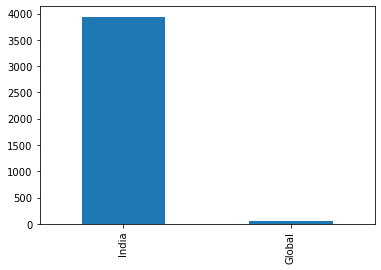

In [83]:
# most favoured work location on ambition box page
final_df['Work_location'].value_counts().plot(kind='bar')

### Top Rated Companies

In [84]:
rate=final_df.groupby('Company_name')['Rating'].max().nlargest(10)
rate

Company_name
Hummingwave Tech...    5.0
Aurigo                 4.9
Claritus Managem...    4.9
E2logy Software ...    4.9
Hire Glocal            4.9
Online Legal Ind...    4.9
Sistema Shyam Te...    4.9
Zovian Technolog...    4.9
75way Technologi...    4.8
AYN InfoTech           4.8
Name: Rating, dtype: float64

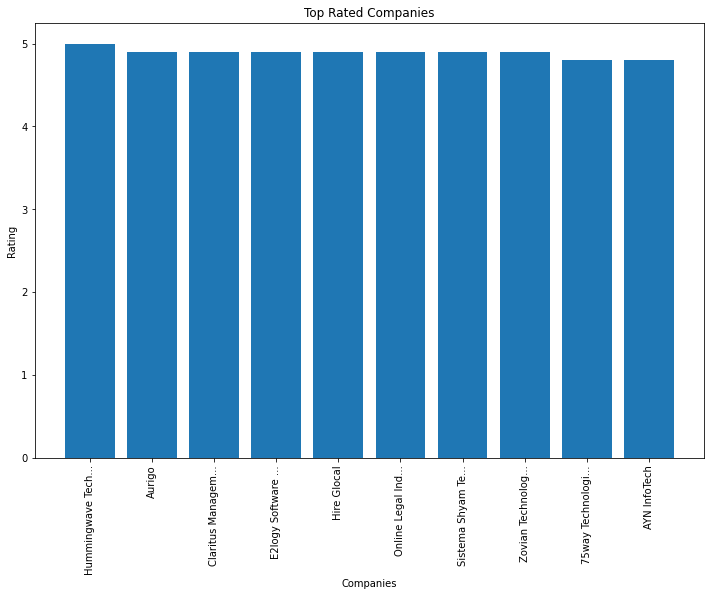

In [85]:
plt.figure(figsize=(12,8))
plt.bar(rate.index, rate)
plt.title('Top Rated Companies')
plt.xlabel('Companies')
plt.ylabel('Rating')
plt.xticks(rotation='vertical')
plt.show()

### Converting the updated dataset into a csv file

In [86]:
final_df.to_csv('data_analysis_project.csv')